In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 10]


In [2]:
theta = np.array([np.random.uniform(0, 1) for i in range(100)])
w = np.array([np.random.normal(0, 1) for i in range(100)])
v = np.array([np.random.normal(0, 1) for i in range(100)])

In [3]:
x = (1 + 2*theta) * np.cos(2 * np.pi * theta) + 0.05 * w
y = (1 + 2*theta) * np.sin(2 * np.pi * theta) + 0.05 * v


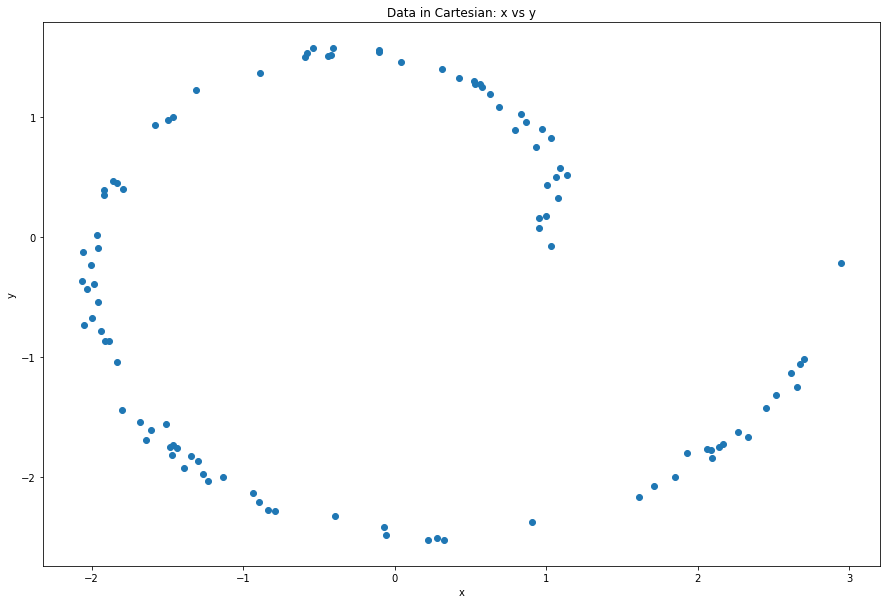

In [4]:
features = 'x y'.split()
data = pd.DataFrame(columns = features)
data.x = x
data.y = y

plt.scatter(data.x, data.y)
plt.title('Data in Cartesian: x vs y')
plt.xlabel('x')
plt.ylabel('y')

# Part A/B
plot points.  comment on success of PCA in reducing from 2D to 1D. 
Then do the PCA to confirm 


In [5]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

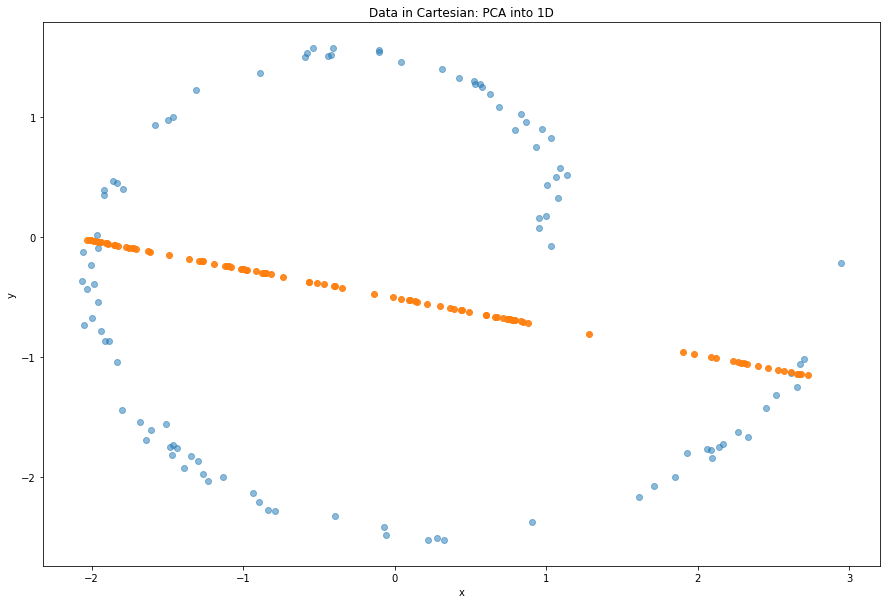

In [6]:
# Applying PCA again 
pca_cartesian = PCA(n_components=1)
pca_cartesian.fit(data)
X_pca = pca_cartesian.transform(data)
X_new = pca_cartesian.inverse_transform(X_pca)
plt.scatter(x, y, alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.title('Data in Cartesian: PCA into 1D')
plt.ylabel('y')
plt.xlabel('x')


# Part C 
APply a change of coordinates by going from cartesian to polar.  
plot points in new coordinate system  
apply PCA again  
Using the 1D information, reconstruct the 2D points first in polar and then in the original cartesian coordinates  (https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com)  
observe how well you approximate the original this time.  
  
Quantify the loss of information energy when you go from 2D to 1D  

In [7]:
def cartesian_to_polar(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

rho, phi = cartesian_to_polar(x, y)
phi = (phi + 2 * np.pi) % (2 * np.pi)

features = 'rho phi'.split()
data_polar = pd.DataFrame(columns = features)
data_polar.rho = rho
data_polar.phi = phi

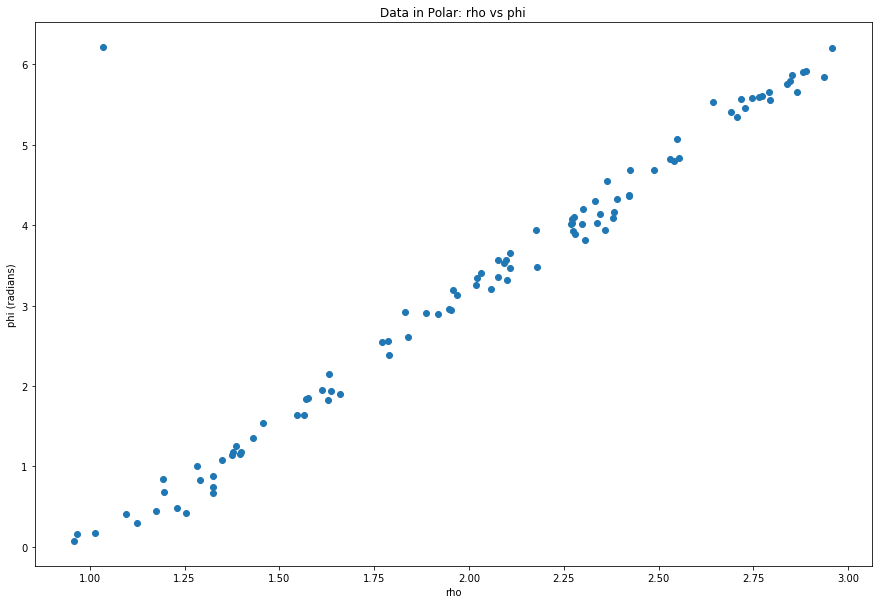

In [8]:
plt.scatter(rho, phi)
plt.title('Data in Polar: rho vs phi')
plt.xlabel('rho')
plt.ylabel('phi (radians)')

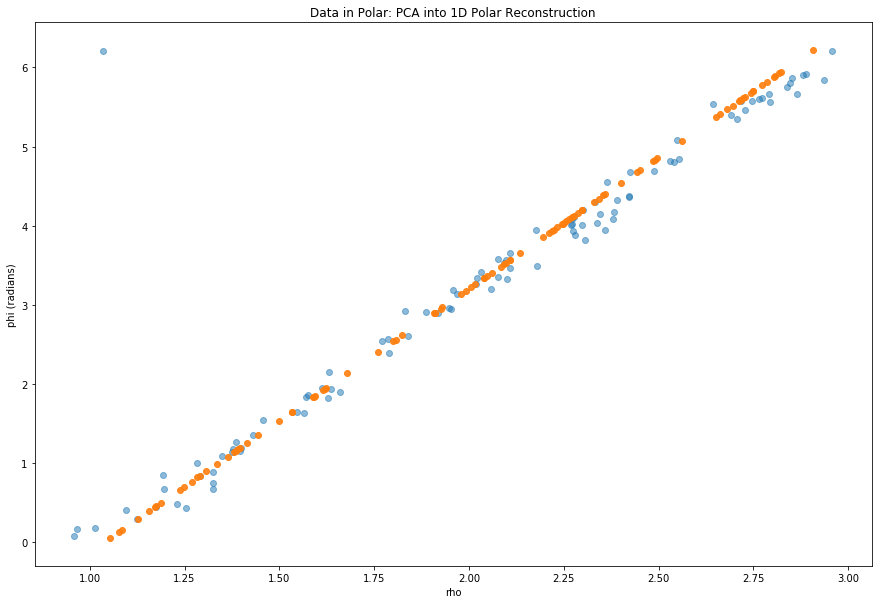

In [9]:
# Applying PCA again 
pca_polar = PCA(n_components=1)
pca_polar.fit(data_polar)
X_pca = pca_polar.transform(data_polar)

X_new = pca_polar.inverse_transform(X_pca)
plt.scatter(rho, phi, alpha=0.5)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.9)
plt.title('Data in Polar: PCA into 1D Polar Reconstruction')
plt.ylabel('phi (radians)')
plt.xlabel('rho')


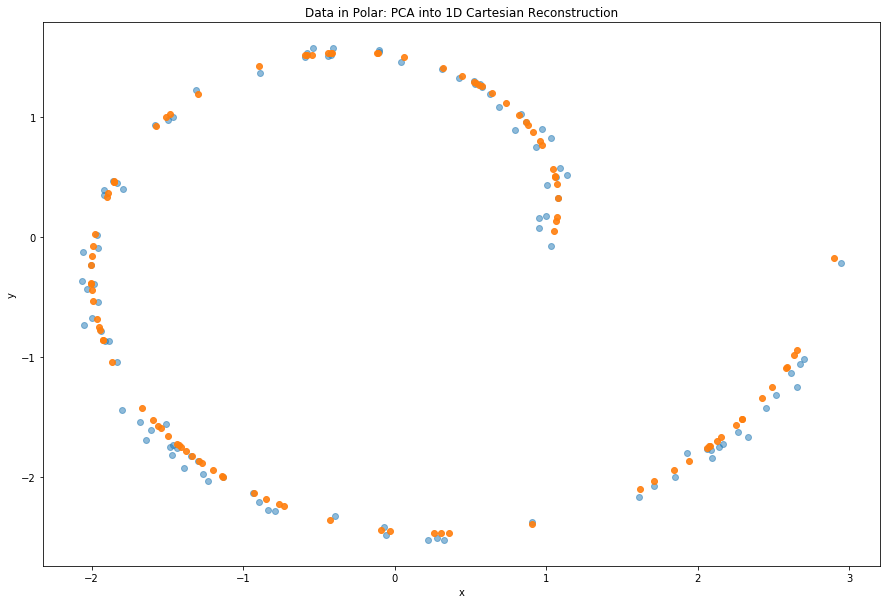

In [10]:
def polar_to_cartesian(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

rho_new = X_new[:, 0]
phi_new = X_new[:, 1]
x_new, y_new = polar_to_cartesian(rho_new, phi_new)

plt.scatter(x, y, alpha=0.5)
plt.scatter(x_new, y_new, alpha=0.9)
plt.title('Data in Polar: PCA into 1D Cartesian Reconstruction')
plt.ylabel('y')
plt.xlabel('x')
